VAIDEHI SHENDE

D1 - 24

PRACTICAL 5

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import os
import random
import shutil

# Define paths to 'yes' and 'no' folders
yes_folder = r'C:\Users\vaide\Downloads\archive (6)\brain_tumor_dataset\yes'
no_folder = r'C:\Users\vaide\Downloads\archive (6)\brain_tumor_dataset\no'

# Define paths to where you want to store training and validation data on your laptop
train_yes_dir = r'C:\Users\vaide\Downloads\archive (6)\brain_tumor_dataset\train\yes'
train_no_dir = r'C:\Users\vaide\Downloads\archive (6)\brain_tumor_dataset\train\no'
val_yes_dir = r'C:\Users\vaide\Downloads\archive (6)\brain_tumor_dataset\validation\yes'
val_no_dir = r'C:\Users\vaide\Downloads\archive (6)\brain_tumor_dataset\validation\no'

# Create directories for training and validation data
os.makedirs(train_yes_dir, exist_ok=True)
os.makedirs(train_no_dir, exist_ok=True)
os.makedirs(val_yes_dir, exist_ok=True)
os.makedirs(val_no_dir, exist_ok=True)

# Define the percentage of data to be used for validation
validation_split = 0.2

# Function to move images from source to destination directory
def move_images(source_dir, destination_dir, file_list):
    for file_name in file_list:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, file_name)
        shutil.move(source_path, destination_path)

# Iterate through 'yes' and 'no' folders
for folder, train_dir, val_dir in zip([yes_folder, no_folder], [train_yes_dir, train_no_dir], [val_yes_dir, val_no_dir]):
    images = os.listdir(folder)
    random.shuffle(images)  # Shuffle the images
    
    # Calculate the split point for validation data
    split_point = int(len(images) * validation_split)
    
    # Move images to training directory
    move_images(folder, train_dir, images[split_point:])
    
    # Move images to validation directory
    move_images(folder, val_dir, images[:split_point])

print("Images divided into training and validation sets and saved into respective folders.")


Images divided into training and validation sets and saved into respective folders.


In [3]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = "C:\\Users\\vaide\\Downloads\\archive (6)\\brain_tumor_dataset\\train"
validation_data_dir="C:\\Users\\vaide\\Downloads\\archive (6)\\brain_tumor_dataset\\validation"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [4]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


In [5]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


In [6]:
import os

def count_files_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

train_images_count = count_files_in_directory(train_data_dir)
validation_images_count = count_files_in_directory(validation_data_dir)

print("Number of images in training directory:", train_images_count)
print("Number of images in validation directory:", validation_images_count)


Number of images in training directory: 204
Number of images in validation directory: 49


In [7]:
import os

def check_image_formats(directory):
    image_formats = set()
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_extension = os.path.splitext(file)[1].lower()
            image_formats.add(file_extension)
    return image_formats

train_image_formats = check_image_formats(train_data_dir)
validation_image_formats = check_image_formats(validation_data_dir)

print("Image formats in training directory:", train_image_formats)
print("Image formats in validation directory:", validation_image_formats)


Image formats in training directory: {'.jpg', '.jpeg', '.png'}
Image formats in validation directory: {'.jpg'}


In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 204 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 49 images belonging to 2 classes.


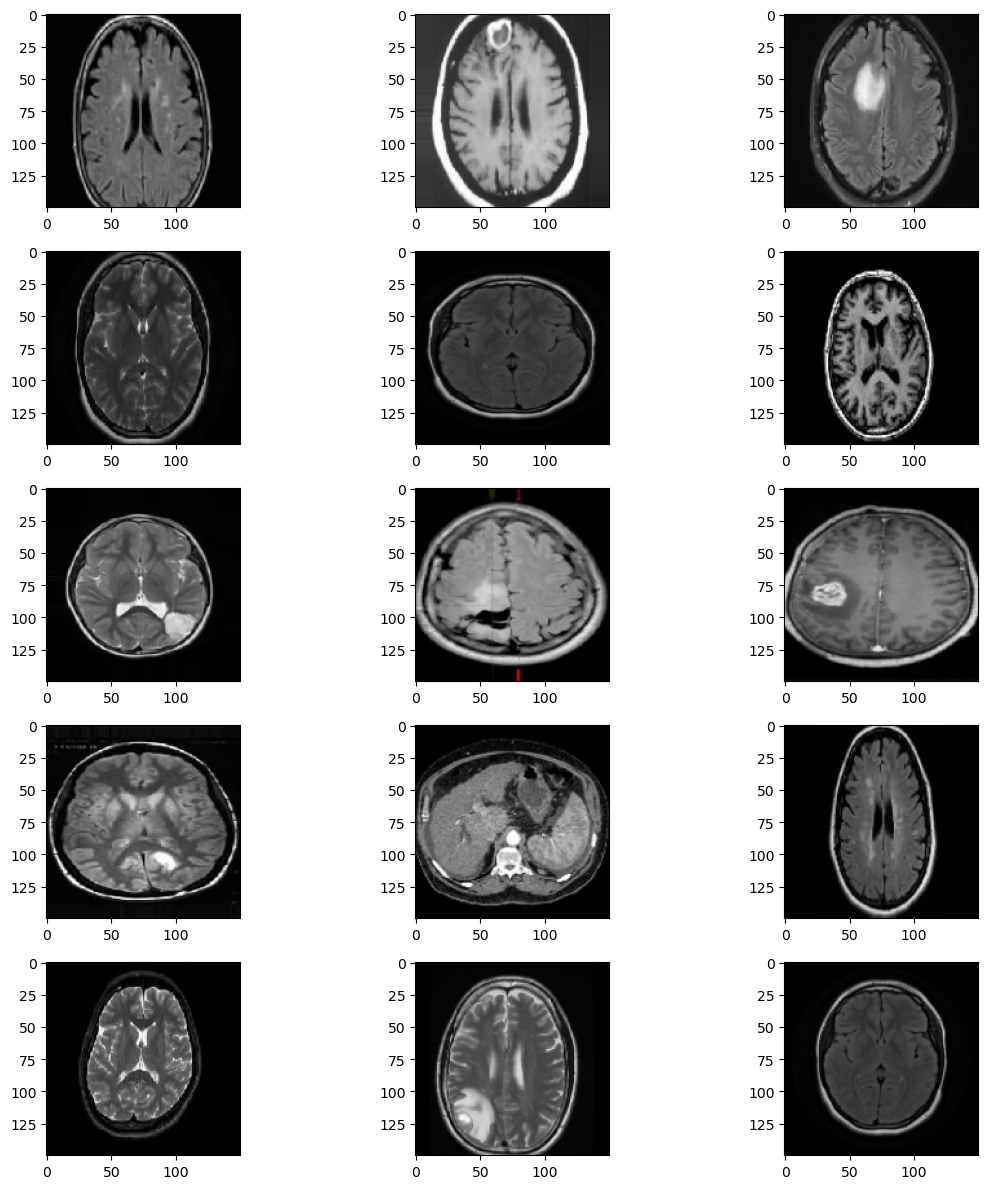

In [10]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

CNN MODEL

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))  # 64 neurons with 3*3 filter
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling2D helps to reduce the size of the data
model.add(Flatten())  # Converts multi-dimensional array to 1D channel
model.add(Dense(64))  # 64 neurons in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1))  # Output layer
model.add(Activation('sigmoid'))  # Sigmoid activation function
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                      

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
training = model.fit(
    train_generator,
    steps_per_epoch=204 // batch_size,  # Adjusted steps_per_epoch
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=49 // batch_size,  # Adjusted validation_steps
)



Epoch 1/20


10/10 [==============================] - 5s 377ms/step - loss: 3.7931 - accuracy: 0.6196 - val_loss: 1.4277 - val_accuracy: 0.6750
Epoch 2/20
10/10 [==============================] - 4s 357ms/step - loss: 0.9033 - accuracy: 0.6522 - val_loss: 0.9482 - val_accuracy: 0.7250
Epoch 3/20
10/10 [==============================] - 4s 364ms/step - loss: 0.5806 - accuracy: 0.7065 - val_loss: 0.6985 - val_accuracy: 0.7750
Epoch 4/20
10/10 [==============================] - 4s 347ms/step - loss: 0.7289 - accuracy: 0.6630 - val_loss: 0.4421 - val_accuracy: 0.8250
Epoch 5/20
10/10 [==============================] - 4s 341ms/step - loss: 0.5310 - accuracy: 0.7174 - val_loss: 0.5473 - val_accuracy: 0.8000
Epoch 6/20
10/10 [==============================] - 4s 342ms/step - loss: 0.6168 - accuracy: 0.7120 - val_loss: 0.4258 - val_accuracy: 0.8250
Epoch 7/20
10/10 [==============================] - 4s 351ms/step - loss: 0.5749 - accuracy: 0.7120 - val_loss: 0.4512 - val_accuracy: 0.8000
Epoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


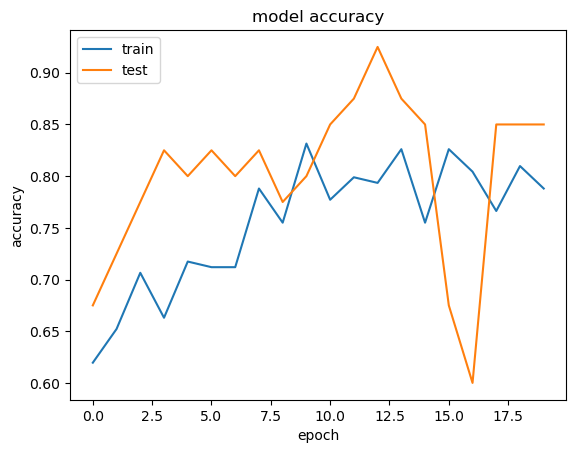

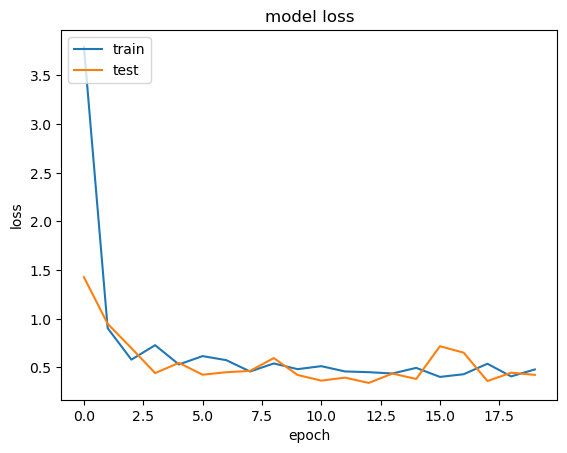

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


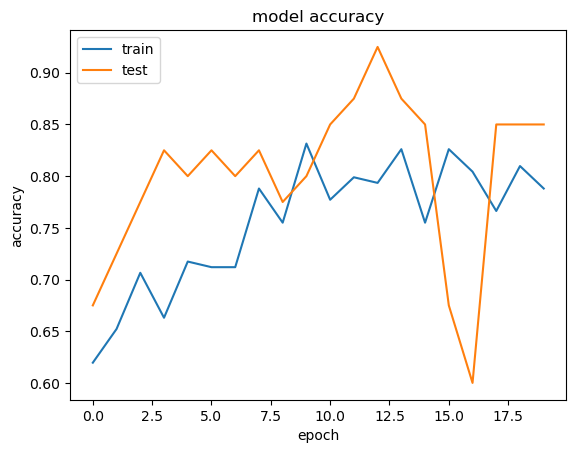

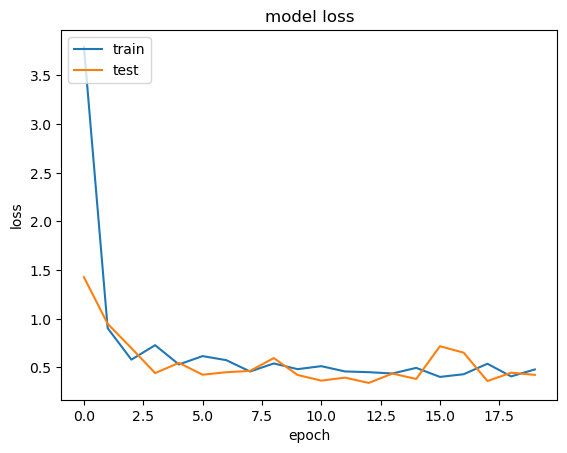

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

PREDICTION

1/1 [==============================] - 0s 141ms/step
[[1.]]
Prediction:  YES


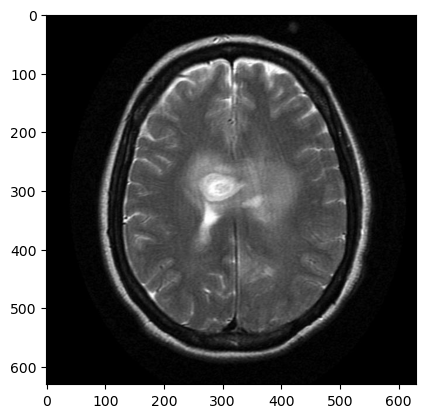

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image for prediction
img_pred = image.load_img(r"C:\Users\vaide\Downloads\archive (6)\yes\Y9.jpg", target_size=(150, 150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

# Predict
rslt = model.predict(img_pred)
print(rslt)

# Interpret prediction
if rslt[0][0] == 1:
    prediction = "YES"
else:
    prediction = "NO"

print('Prediction: ', prediction)

# Display the image
img = plt.imread(r"C:\Users\vaide\Downloads\archive (6)\yes\Y9.jpg")
plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 63ms/step
[[0.]]
Prediction:  NO


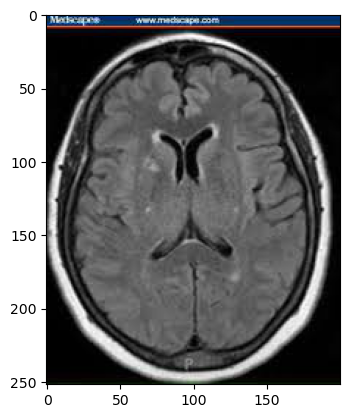

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_pred = image.load_img(r"C:\Users\vaide\Downloads\archive (6)\no\31 no.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="YES"
else:
    prediction ="NO"
print('Prediction: ',prediction)

img=mpimg.imread(r"C:\Users\vaide\Downloads\archive (6)\no\31 no.jpg")
imgplot = plt.imshow(img)
plt.show()


In [18]:
validation_generator.reset()  # Reset generator to start from the beginning
accuracy = model.evaluate_generator(validation_generator)[1]  # Index 1 corresponds to accuracy
print("Accuracy:", accuracy)


C:\Users\vaide\AppData\Local\Temp\ipykernel_10048\3259495802.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy = model.evaluate_generator(validation_generator)[1]  # Index 1 corresponds to accuracy


Accuracy: 0.8775510191917419


CNN MODEL 2

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training
model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [20]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                     

In [21]:

training = model.fit(
    train_generator,
    steps_per_epoch=204 // batch_size, # Adjusted steps_per_epoch
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=49 // batch_size,callbacks=callbacks  # Adjusted validation_steps
)

Epoch 1/20
10/10 [==============================] - 4s 363ms/step - loss: 0.3371 - accuracy: 0.8641 - val_loss: 0.4378 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 4s 348ms/step - loss: 0.4301 - accuracy: 0.7826 - val_loss: 0.3266 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 4s 363ms/step - loss: 0.3758 - accuracy: 0.8533 - val_loss: 0.4664 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 4s 421ms/step - loss: 0.4789 - accuracy: 0.7880 - val_loss: 0.3703 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 4s 340ms/step - loss: 0.4209 - accuracy: 0.8370 - val_loss: 0.3290 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 3s 324ms/step - loss: 0.4046 - accuracy: 0.8207 - val_loss: 0.3198 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 3s 340ms/step - lo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


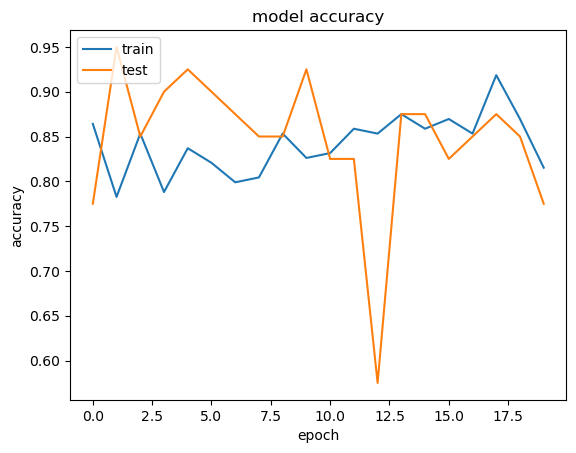

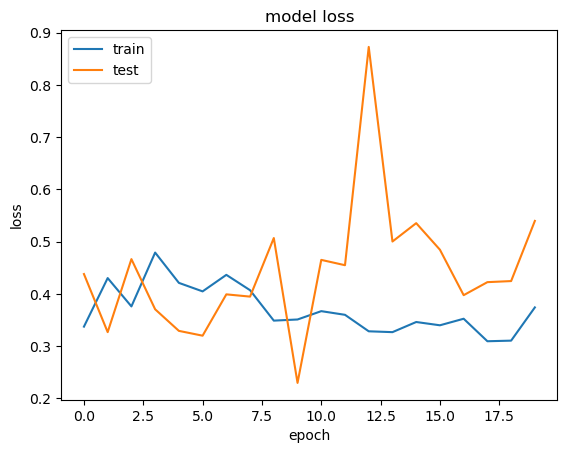

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 22ms/step
[[1.]]
Prediction:  YES


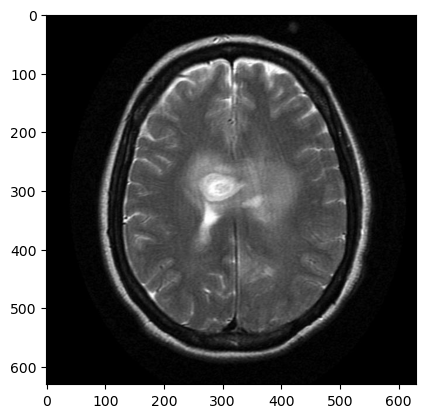

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image for prediction
img_pred = image.load_img(r"C:\Users\vaide\Downloads\archive (6)\yes\Y9.jpg", target_size=(150, 150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

# Predict
rslt = model.predict(img_pred)
print(rslt)

# Interpret prediction
if rslt[0][0] == 1:
    prediction = "YES"
else:
    prediction = "NO"

print('Prediction: ', prediction)

# Display the image
img = plt.imread(r"C:\Users\vaide\Downloads\archive (6)\yes\Y9.jpg")
plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 32ms/step
[[0.]]
Prediction:  NO


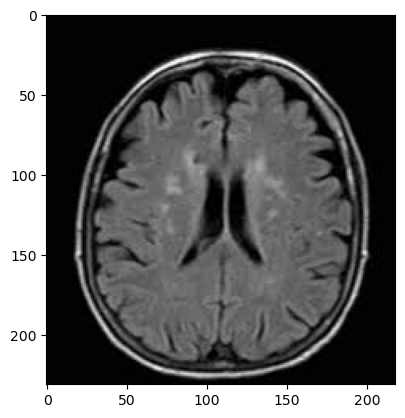

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_pred = image.load_img(r"C:\Users\vaide\Downloads\archive (6)\no\17 no.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="YES"
else:
    prediction ="NO"
print('Prediction: ',prediction)

img=mpimg.imread(r"C:\Users\vaide\Downloads\archive (6)\no\17 no.jpg")
imgplot = plt.imshow(img)
plt.show()


In [25]:
# Assuming validation_generator is your generator for validation data
validation_generator.reset()  # Reset generator to start from the beginning
accuracy = model.evaluate_generator(validation_generator)[1]  # Index 1 corresponds to accuracy
print("Accuracy:", accuracy)


C:\Users\vaide\AppData\Local\Temp\ipykernel_10048\3049760523.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy = model.evaluate_generator(validation_generator)[1]  # Index 1 corresponds to accuracy


Accuracy: 0.795918345451355
